# Linear Regression using python

This is an example of simple dataset to perform a linear regression taken out from a HackerRank challenge.

In [6]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression

In [45]:
known_prices = np.array(
    [0.18, 0.89, 109.85, 
1.0, 0.26, 155.72, 
0.92, 0.11, 137.66,
0.07, 0.37, 76.17,
0.85, 0.16, 139.75,
0.99, 0.41, 162.6,
0.87, 0.47, 151.77])

unknown_prices = np.array([0.49, 0.18,
0.57, 0.83,
0.56, 0.64,
0.76, 0.18]
)

In [46]:
known_prices = np.reshape(known_prices, (7,3))


known_prices



array([[1.8000e-01, 8.9000e-01, 1.0985e+02],
       [1.0000e+00, 2.6000e-01, 1.5572e+02],
       [9.2000e-01, 1.1000e-01, 1.3766e+02],
       [7.0000e-02, 3.7000e-01, 7.6170e+01],
       [8.5000e-01, 1.6000e-01, 1.3975e+02],
       [9.9000e-01, 4.1000e-01, 1.6260e+02],
       [8.7000e-01, 4.7000e-01, 1.5177e+02]])

In [9]:

unknown_prices = np.reshape(unknown_prices, (4,2))

unknown_prices

array([[0.49, 0.18],
       [0.57, 0.83],
       [0.56, 0.64],
       [0.76, 0.18]])

In [10]:
# Test some slicing
known_prices[0:3]

array([[1.8000e-01, 8.9000e-01, 1.0985e+02],
       [1.0000e+00, 2.6000e-01, 1.5572e+02],
       [9.2000e-01, 1.1000e-01, 1.3766e+02]])

In [11]:
df_known = pd.DataFrame(known_prices)

df_known

,0,1,2
0,0.18,0.89,109.85
1,1.00,0.26,155.72
2,0.92,0.11,137.66
3,0.07,0.37,76.17
4,0.85,0.16,139.75
5,0.99,0.41,162.60
6,0.87,0.47,151.77


In [12]:
df_unknown = pd.DataFrame(unknown_prices)

df_unknown

,0,1
0,0.49,0.18
1,0.57,0.83
2,0.56,0.64
3,0.76,0.18


<AxesSubplot: xlabel='0', ylabel='1'>

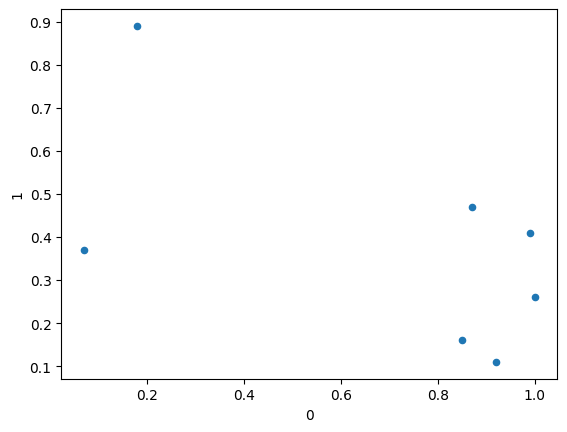

In [13]:
df_known.plot(x = 0, y = 1, kind = 'scatter')

<AxesSubplot: xlabel='0', ylabel='1'>

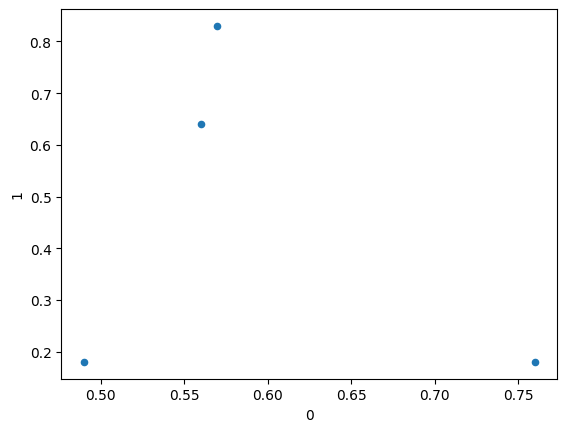

In [14]:
df_unknown.plot(x = 0, y = 1, kind = 'scatter')

We can see there are points in the unknown data with some similar features as the points in known data.

Next thing is to run a multiple linear regression of features 0 and 1 to predict feature 2, the house price.

In [15]:
reg = LinearRegression()

reg.fit(df_known[[0,1]], df_known[[2]])

print(reg.coef_)


[[90.69331739 46.46296549]]


In [16]:
# Try without print() to see if that works
reg.coef_

array([[90.69331739, 46.46296549]])

In [17]:
reg.intercept_

array([52.41149905])

The interpretation of the coefficients is:
- At feature 0 and feature 1 values of zero, the house price will be $52.4.
- Each one unit increase of feature 0 will increase $90.6 in the house price.
- Each one unit increase of feature 1 will increase $46.5 in the house price.

Now we can predict unknown house values.

In [44]:
predict_unknown = reg.predict(df_unknown)

predicted_df = round(pd.DataFrame(predict_unknown), 2)

for i in predicted_df[0]:
    print(i)

105.21
142.67
132.94
129.7


Now just a test below using loc and iloc:

In [29]:
# Iloc is the numeric position
df_known.iloc[:,0:3]

# Loc is the label-based index
df_known.loc[:,0:2]

,0,1,2
0,0.18,0.89,109.85
1,1.00,0.26,155.72
2,0.92,0.11,137.66
3,0.07,0.37,76.17
4,0.85,0.16,139.75
5,0.99,0.41,162.60
6,0.87,0.47,151.77
